# Predicting Covid-19, Using Custom CNN Model

In [1]:
#Data Analysis Phase
#Main Aim is to understnad more about the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
##Display all the columns in Data Frame

pd.pandas.set_option('display.max_columns',None)

# For prepocessing
from sklearn import preprocessing
# For Train Test Split
from sklearn.model_selection import train_test_split

# Importing Deep Learning Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import optimizers
from keras.utils import to_categorical

#For CNN
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten,Activation
import cv2  

C:\Users\Mizgaan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
train_path = r'C:\Users\Mizgaan\Downloads\COVID-CT-master\Train'
valid_path = r'C:\Users\Mizgaan\Downloads\COVID-CT-master\Test'

In [3]:
# Preprocessing training Set
from keras.preprocessing.image import ImageDataGenerator


In [4]:
train_data_gen=ImageDataGenerator(rescale=1/255, shear_range=0.2,
                   zoom_range=0.2,horizontal_flip=True)

train_set=train_data_gen.flow_from_directory(train_path,
                                   target_size=(64,64),batch_size=32,class_mode='categorical')


Found 746 images belonging to 2 classes.


In [5]:
test_gen=ImageDataGenerator(rescale=1/255)

test_set=test_gen.flow_from_directory(valid_path,
                             target_size=(64,64),batch_size=32,class_mode='categorical')

Found 314 images belonging to 2 classes.


## Making CNN Model

In [6]:
classifier =Sequential()


In [7]:
#Adding 1st Convolutional Layer
classifier.add(Conv2D(filters =32,kernel_size=(3,3),padding = 'Same',activation='relu',kernel_initializer = 'he_uniform',
                                                input_shape=[64,64,3]))          
# classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


# Adding 2nd Convolutional Layer
classifier.add(Conv2D(filters =28,kernel_size=(3,3),padding = 'Same',activation='relu',kernel_initializer = 'he_uniform'))   

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# classifier.add(Dropout(0.3)) # To avoid Overfitting we use Drop Out Layer
 
    
# Adding 3rd Convolutional Layer
classifier.add(Conv2D(filters =30,kernel_size=(3,3),activation='relu',kernel_initializer = 'he_uniform'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Dropout(0.6))

# # Adding 4th Convolutional Layer
# classifier.add(Conv2D(filters =30,kernel_size=(3,3),activation='relu',kernel_initializer = 'he_uniform'))

# # Adding 5th Convolutional Layer
# classifier.add(Conv2D(filters =28,kernel_size=(3,3),padding = 'Same',activation='relu',kernel_initializer = 'he_uniform'))   

# classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#         kernel_size=hp.Choice('conv_3_filter', values = [3,5]),padding = 'Same',   
   
classifier.add(Flatten())
# classifier.add(Dense(512))
    # Adding the output layer
#     classifier.add(Dense(units=('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'))
   

classifier.add(Dense(20,activation='relu'))
classifier.add(Dense(15,activation='relu'))


classifier.add(Dense(units=2, activation='softmax',kernel_initializer = 'glorot_uniform'))
    
    

In [8]:
# Compiling
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    

In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 28)        8092      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 30)        7590      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6750)             

In [10]:
model_history=classifier.fit(x=train_set, validation_data=test_set,epochs = 100)


Epoch 1/100
24/24 [==============================] - 10s 415ms/step - loss: 0.7317 - accuracy: 0.4638 - val_loss: 0.6661 - val_accuracy: 0.5732
Epoch 2/100
24/24 [==============================] - 9s 385ms/step - loss: 0.6901 - accuracy: 0.5375 - val_loss: 0.6760 - val_accuracy: 0.5764
Epoch 3/100
24/24 [==============================] - 9s 388ms/step - loss: 0.6782 - accuracy: 0.5617 - val_loss: 0.6681 - val_accuracy: 0.6146
Epoch 4/100
24/24 [==============================] - 9s 372ms/step - loss: 0.6618 - accuracy: 0.6005 - val_loss: 0.6408 - val_accuracy: 0.6051
Epoch 5/100
24/24 [==============================] - 9s 376ms/step - loss: 0.6363 - accuracy: 0.6461 - val_loss: 0.7153 - val_accuracy: 0.4713
Epoch 6/100
24/24 [==============================] - 9s 365ms/step - loss: 0.6189 - accuracy: 0.6475 - val_loss: 0.7028 - val_accuracy: 0.6146
Epoch 7/100
24/24 [==============================] - 9s 372ms/step - loss: 0.6169 - accuracy: 0.6582 - val_loss: 0.5654 - val_accuracy: 0.684

Epoch 58/100
24/24 [==============================] - 21s 886ms/step - loss: 0.4092 - accuracy: 0.8070 - val_loss: 0.1830 - val_accuracy: 0.8312
Epoch 59/100
24/24 [==============================] - 22s 900ms/step - loss: 0.3916 - accuracy: 0.8110 - val_loss: 0.2820 - val_accuracy: 0.8408
Epoch 60/100
24/24 [==============================] - 22s 902ms/step - loss: 0.3928 - accuracy: 0.8231 - val_loss: 0.3396 - val_accuracy: 0.8567
Epoch 61/100
24/24 [==============================] - 22s 907ms/step - loss: 0.3765 - accuracy: 0.8137 - val_loss: 0.2687 - val_accuracy: 0.8694
Epoch 62/100
24/24 [==============================] - 22s 904ms/step - loss: 0.3711 - accuracy: 0.8378 - val_loss: 0.3553 - val_accuracy: 0.8790
Epoch 63/100
24/24 [==============================] - 21s 883ms/step - loss: 0.3609 - accuracy: 0.8271 - val_loss: 0.3040 - val_accuracy: 0.8822
Epoch 64/100
24/24 [==============================] - 21s 895ms/step - loss: 0.3715 - accuracy: 0.8244 - val_loss: 0.2333 - val_ac

## Model Accuracy for Test Data

In [35]:
test_loss,test_acc=classifier.evaluate(test_set)

print('{:#.3g}'.format(test_acc),' : Is the accuracy \n')
print(np.round(test_loss,2),':  Is the Loss')

0.917  : Is the accuracy 

0.28 :  Is the Loss


## Model Performance

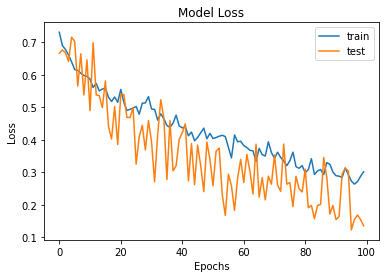

In [11]:
#plot the Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

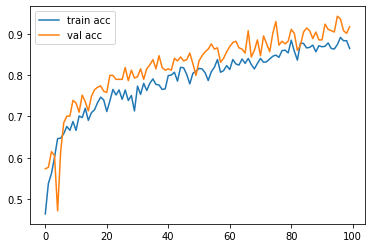

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
classifier.save('Covid-19_X_RayImg.h5')

### Loading the Image 

In [14]:
from tensorflow.keras.models import load_model
model=load_model('Covid-19_X_RayImg.h5')

### Making Single Prediciton

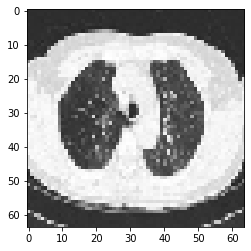

In [74]:
from tensorflow.keras.preprocessing import image

test_img=image.load_img(r'C:\Users\Mizgaan\Downloads\COVID-CT-master\Train\CT_NonCOVID\5%2.jpg',target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=test_img/255

plt.imshow(test_img)

test_img=np.expand_dims(test_img,axis=0)

In [75]:
reslt=classifier.predict(test_img)

In [76]:
reslt

array([[0.00357382, 0.99642617]], dtype=float32)

In [77]:
if reslt[0][0]>0.5:
    print('The Image is Covid Postive') 
else:
    print('The Image is Covid Negative')    

The Image is Covid Negative


In [78]:
if reslt[0][0]>reslt[0][1]:
    print('The Image is Covid Postive') 
else:
    print('The Image is Covid Negative')

The Image is Covid Negative
